# Simple SVM Example

Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image. This is a binary classification problem and we will use SVM algorithm to solve this problem.

In [18]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
#%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
bankdata = pd.read_csv("C:\\Users\\rahul\\OneDrive\\BIZOP\\AFI Tech Bangalore\\\
TRAINING CONTENT\\bill_authentication.csv") 

### Exploratory Data Analysis (EDA)

In [4]:
bankdata.shape  

(1372, 5)

In [5]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
bankdata.head()  

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Variance    1372 non-null float64
Skewness    1372 non-null float64
Curtosis    1372 non-null float64
Entropy     1372 non-null float64
Class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### Pre processing

In [8]:
X = bankdata.drop('Class', axis=1)  
y = bankdata['Class']

In [9]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

### Training the model

In [21]:
svclassifier = SVC(kernel='linear') 

In [22]:
svclassifier.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Predictions

In [12]:
y_pred = svclassifier.predict(X_test) 

### Evaluation

In [13]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  

[[143   1]
 [  1 130]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      0.99      0.99       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [15]:
w = svclassifier.coef_[0]
print(w)

[-2.44038544 -1.41421251 -1.70582555 -0.23589348]


TypeError: '(slice(None, None, None), 0)' is an invalid key

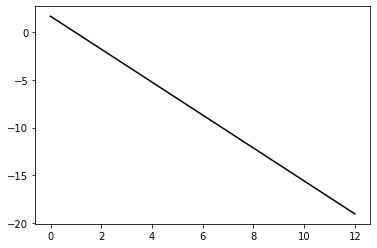

In [20]:
a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - svclassifier.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(bankdata[:, 0], bankdata[:, 1], c = y)
plt.legend()
plt.show()